In [1]:
import pandas as pd #data manpulation
import numpy as np
import matplotlib.pyplot as plt #data visualization
import seaborn as sns
import scipy

# 1) Cleaning + EDA + Standarization + Encoding 
import chardet #to detetmine dataset encoding

#preprocessing: replace numeric and categorical
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder # label (ordinal or nominal)
from sklearn.preprocessing import OrdinalEncoder # object (no order)
from sklearn.preprocessing import OneHotEncoder # categorical 

# data imbalanced
from imblearn.datasets import make_imbalance # undersampling
from sklearn.utils import resample # oversampling
from imblearn.over_sampling import SMOTE # SMOTE

# 2) Standarize nad change dist of features
from sklearn.preprocessing import StandardScaler # scaling data so mean = 0 and std =  1 by ((x- u) / std)
from scipy import stats # for Box-Cox Transformation stats.boxcox(original_data)[0]
from mlxtend.preprocessing import minmax_scaling # for min_max scaling dont use it
#or
from sklearn.preprocessing import MinMaxScaler,normalize  #Tune input range to be 0 -> 1 by MinMaxScaler, same as above


# 3) feature enginerring
from sklearn.feature_selection import mutual_info_regression #mutal importance of feature
from sklearn.feature_selection import RFE, RFECV 
# a) numeric feature enginering
from sklearn.cluster import KMeans # Kmeans model for cluster feature
from scipy.spatial.distance import cdist # for elpow method
from sklearn.decomposition import PCA # for loadings and adding new feature
# b) categorical feature enginering
from category_encoders import MEstimateEncoder # have m estimator


# 4) Data Modeling = train test split then model then get error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, ShuffleSplit #also has cross_val_score (cv)
from sklearn.model_selection import RepeatedKFold # k fold cross validation it specify cv in corss_val_score dw
from sklearn.model_selection import cross_val_score # cv to get mean and see how much this feature affect the MAE error
# ML algorithms
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
# Evaluation for model
from sklearn.metrics import *
from sklearn.metrics import mean_absolute_error, mean_squared_error
#for accurace of regression use model.score(X_test, y_test) mean_absolute_error, mean_squared_error

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
#for accurace of classification use precision, recall, f1, acc, classification_report, confusion_matrix, roc_curve (tpr, fpr) & roc_auc_score (AUC)

# you can use (cross_val_score == KFold) (like validation_split=0.1 to get validation_acc) for calssification or regression

#pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

# 5) Model summary = features importance and effect + sharp values
import eli5
from eli5.sklearn import PermutationImportance # feature importance
# from pdpbox import pdp, get_dataset, info_plots #for pdp plots
import shap  # package used to calculate Shap values
import time

# 6) DNN & images & audio visualize
import tensorflow as tf
import cv2
import IPython

C:\Users\ahmed\.conda\envs\machine_learning\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


# 1) Start with Data
* features understand
* dtypes
* Error->NaN
* describe

In [2]:
file = open('creditcard.csv', 'rb')
result = chardet.detect(file.read(10000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [3]:
df = pd.read_csv('creditcard.csv', encoding=result['encoding'])
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
columns = df.columns # time - v1->v28 - amount - class
# time: time btn this transaction and first transaction
# v1->v28: PCA of use info
# amount: value of transaction
# class: 0->transaction, 1->fraud
columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
# dtypes
df.info() # time should be intger

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df['Time'] = df['Time'].astype('int64')
df.info() # No NaNs also

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  int64  
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Errors -> NaN
# 0 in column 'Amount' is NaN and No wrong patterns detected
columns = ['Amount']
for col in columns:
    print(col+': has', df[col].nunique(), 'uniques')
    print(sorted(df[col].unique()))
    print()

Amount: has 32767 uniques
[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 

In [8]:
df['Amount'] = df['Amount'].replace(0.0, np.nan)

In [9]:
df.describe()
# ranges are diff in time, amount, v1->v28 also mean != 0 & std != 1 so need StandardScaler

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,282982.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.919401,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.824374,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.010000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.990000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.490000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,78.000000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# 2) Cleaning
* NaN
* duplicates
* outliers
* data inconsistency

In [10]:
# NaN
(sum(df.isna().sum()) / df.shape[0]) * 100 # 0.64%

0.6407848121710491

In [11]:
# Impute NaN so make train_test_split + see distrbution first so will compute it after duplicates

In [12]:
# duplicates
values = [[1,2,3], [1,2,3]]
new_df = pd.DataFrame(values)
new_df.duplicated() 

0    False
1     True
dtype: bool

In [13]:
listo = df.duplicated()
idx = np.where(listo == True)[0]
df.iloc[idx, :]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [14]:
df = df.drop_duplicates()
sum(df.duplicated())

0

In [15]:
# Impute NaN so make train_test_split + see distrbution first so will compute it after duplicates
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) # prevent dataleakge from the start
# 284807 record so test_size could be 10% = 28480 record

 Min: 0.01 Max: 25691.16 
 mean: 89.24555519206666 std: 253.93940746367443 
 median: 22.6 
 mode: 1.0


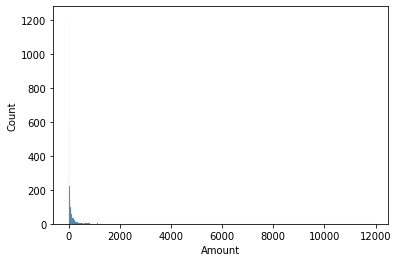

In [16]:
# No classes so no Groupby in this case just see dist and decide which imputer to use on X_train
data = X_train['Amount'].sample(4000, random_state=32)
col = 'Amount'
print(' Min:', X_train[col].min(), 'Max:', X_train[col].max(), '\n mean:', X_train[col].mean(), 'std:', X_train[col].std(),'\n', 'median:', X_train[col].median(), '\n', 'mode:', X_train[col].mode()[0])
sns.histplot(data)
plt.show()
# mean = 89, median = 22.5, mode=1 => best imputer won't be mode (alot of small values) and not mean (outliers exsist)
# so median

In [17]:
median = {}
numeric_imputes = ['Amount']
for col in numeric_imputes:
    median['median_'+str(col)] = X_train[col].median()
median

{'median_Amount': 22.6}

In [18]:
for col in numeric_imputes: # to prevent data leakage
    X_train[col] = X_train[col].replace(np.nan, median['median_'+str(col)])
    X_test[col] = X_test[col].replace([np.nan, 0], median['median_'+str(col)]) # used median on training
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255353 entries, 259024 to 207861
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    255353 non-null  int64  
 1   V1      255353 non-null  float64
 2   V2      255353 non-null  float64
 3   V3      255353 non-null  float64
 4   V4      255353 non-null  float64
 5   V5      255353 non-null  float64
 6   V6      255353 non-null  float64
 7   V7      255353 non-null  float64
 8   V8      255353 non-null  float64
 9   V9      255353 non-null  float64
 10  V10     255353 non-null  float64
 11  V11     255353 non-null  float64
 12  V12     255353 non-null  float64
 13  V13     255353 non-null  float64
 14  V14     255353 non-null  float64
 15  V15     255353 non-null  float64
 16  V16     255353 non-null  float64
 17  V17     255353 non-null  float64
 18  V18     255353 non-null  float64
 19  V19     255353 non-null  float64
 20  V20     255353 non-null  float64
 21  V21  

 Min: 0.01 Max: 25691.16 
 mean: 88.8177863193305 std: 253.17907580269028 
 median: 22.6 
 mode: 1.0


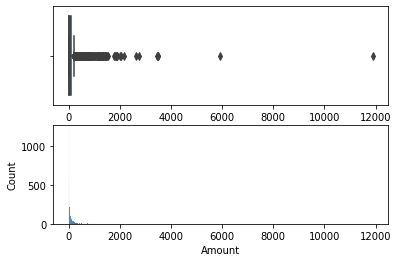

In [19]:
# outliers: only coulmn that could have outlier is Amount so lets see it's boxplot first
fig, axes = plt.subplots(2, 1)
data = X_train['Amount'].sample(4000, random_state=32)
sns.boxplot(x=data, ax=axes[0]) # random 4000 samples to show
col = 'Amount'
print(' Min:', X_train[col].min(), 'Max:', X_train[col].max(), '\n mean:', X_train[col].mean(), 'std:', X_train[col].std(),'\n', 'median:', X_train[col].median(), '\n', 'mode:', X_train[col].mode()[0])
sns.histplot(x=data, ax=axes[1]) # right skewed with alot outliers
plt.show()

 Min: 0.009950330853168083 Max: 8.354518955741435 
 mean: 3.181571376434197 std: 1.6364561068814591 
 median: 3.1728313381359077 
 mode: 0.6931471805599453


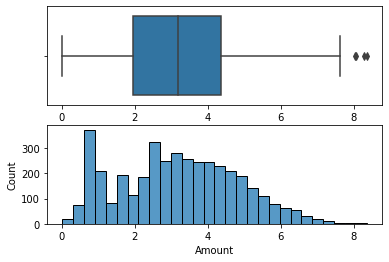

In [20]:
# lets try mathmatical transformer: log as values are large
fig, axes = plt.subplots(2, 1)
data = np.log1p(X_train['Amount'])
data = data.sample(4000)
sns.boxplot(x=data, ax=axes[0]) # random 4000 samples to show
print(' Min:',data.min(), 'Max:', data.max(), '\n mean:', data.mean(), 'std:', data.std(),'\n', 'median:', data.median(), '\n', 'mode:', data.mode()[0])
sns.histplot(x=data, ax=axes[1]) # right skewed with alot outliers
plt.show()

 Min: 0.009950330853168083 Max: 10.153941165977784 
 mean: 3.174205080068441 std: 1.6380703365845553 
 median: 3.1612467120315646 
 mode: 0.6931471805599453


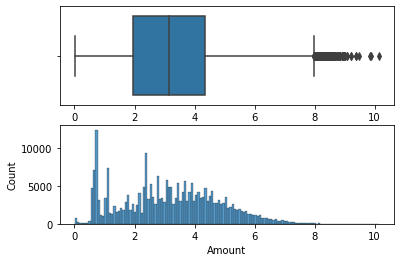

In [21]:
# log makes Amount distrbution much better (not right skewed almost normal dist. which is good for model)
# let's see largest value in whole dataset not just sample to determine if it has outlier or not
# but remember we need to np.log the 'Amount' in X_test also
fig, axes = plt.subplots(2, 1)
data = np.log1p(X_train['Amount'])
# data = data.sample(4000)
sns.boxplot(x=data, ax=axes[0]) # random 4000 samples to show
print(' Min:',data.min(), 'Max:', data.max(), '\n mean:', data.mean(), 'std:', data.std(),'\n', 'median:', data.median(), '\n', 'mode:', data.mode()[0])
sns.histplot(x=data, ax=axes[1]) # right skewed with alot outliers
plt.show()

In [22]:
# data seems have still outlier at 8->10 so remove it using IQR bcz we have 'domain knowledge + obviouse outlier'

# target and item_visability are outliers
def remove_outlier(col):
    sorted(col) #sort column then get Q1, Q3 at 25% and 75% of sorted col
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

-1.6834465465682469 7.991025727602329
 Min: 0.009950330853168083 Max: 7.991025727602329 
 mean: 3.1738355223853865 std: 1.6369075940933333 
 median: 3.1612467120315646 
 mode: 0.6931471805599453


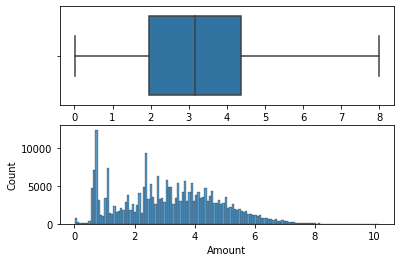

In [23]:
# Experiment 1&2
X_train['Amount'] = np.log1p(X_train['Amount']) # used log and now remove outliers using IQR
X_test['Amount'] = np.log1p(X_test['Amount'])
outliers = ['Amount']
outliers_IQR = outliers
outliers_treatment = []
# train data
for col in outliers_IQR:
    low_item_visability, high_item_visability = remove_outlier(X_train[col]) #lower and upper range
    outliers_treatment.append((col, low_item_visability, high_item_visability))
    
    X_train[col] = np.where(X_train[col] < low_item_visability, low_item_visability, X_train[col])
    X_train[col] = np.where(X_train[col] > high_item_visability, high_item_visability, X_train[col])
    print(low_item_visability, high_item_visability)
    fig, axes = plt.subplots(2, 1)
    sns.boxplot(x=X_train[col], ax=axes[0])
    print(' Min:',X_train[col].min(), 'Max:', X_train[col].max(), '\n mean:', X_train[col].mean(), 'std:', X_train[col].std(),'\n', 'median:', X_train[col].median(), '\n', 'mode:', X_train[col].mode()[0])
    sns.histplot(x=data, ax=axes[1]) # right skewed with alot outliers
    plt.show()
    
# test data to prevent data leakage
for (col, low_item_visability, high_item_visability) in outliers_treatment:
    # outliers_treatment
    X_test[col] = np.where(X_test[col] < low_item_visability, low_item_visability, X_test[col])
    X_test[col] = np.where(X_test[col] > high_item_visability, high_item_visability, X_test[col])

In [24]:
# no data inconsistency so save cleaned data
'''
1. test is imputed already.
2. X_test['Amount'] = np.log1p(X_test['Amount']) + IQR of training -> is already done.
'''
X_train.to_csv('X_train.csv', index=False)

# 3) EDA (Explinatory Data Analysis)

### Univariate Analysis

From EDA url

**For each variable (independant = (features) or dependant = (Label)) get 1, 2, 3 by a & b**

1) dtype, count, unique values

2) min, max, mean, median, mode, std

3) dist + skewness & count (pie or countplot) 


* a) numeric variable: distrbution of each feature.
* b) categorical variable: percentages by pie_chart (or) Groupby if high cardinality.

### bivariate Analysis

**Relation between independant variable and target (dependant variable)**

1) **corr matrix** by heatmap (remove one feature corr btn them is very large corr > 0.9, as they should be independant variables)

2) a, b & c

a) Numerical vs. Numerical
1. **Scatterplot**
2. Line plot (for trends)
3. Heatmap for correlation (correlation matrix) .corr
4. Joint plot

b) Categorical vs. Numerical
1. Bar chart
2. Violin plot
3. Categorical box plot
4. **Swarm plot**

c) Two Categorical Variables
1. **Bar chart**
2. Grouped bar chart
3. Point plot

### Multivariate Analysis

**just use pairplot**

In [25]:
X_train = pd.read_csv('X_train.csv')

In [26]:
y_train = pd.DataFrame(y_train.values, columns=['Class'])
y_test = pd.DataFrame(y_test.values, columns=['Class'])
y_train['Class']

0         0
1         0
2         0
3         0
4         0
         ..
255348    0
255349    0
255350    0
255351    0
255352    0
Name: Class, Length: 255353, dtype: int64

 Min: 0 Max: 172792 
 mean: 94804.91002651231 std: 47491.78336280906 
 median: 84672.0 
 mode: 3767


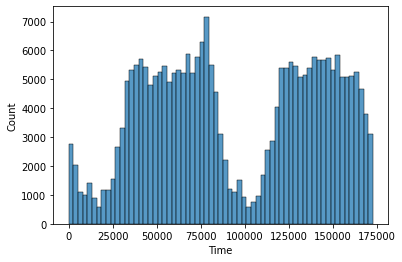

 Min: -56.407509631329 Max: 2.45492999121121 
 mean: 0.006309057250328901 std: 1.95130213331369 
 median: 0.0216223956040241 
 mode: 2.05579700630039


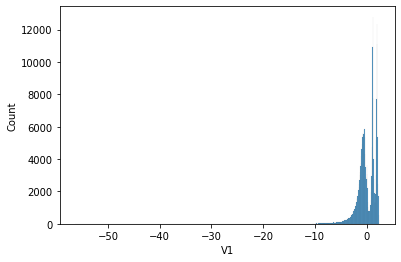

 Min: -72.7157275629303 Max: 22.0577289904909 
 mean: -0.004738596520156736 std: 1.6532237672423644 
 median: 0.0638836324377401 
 mode: -0.32666777306077


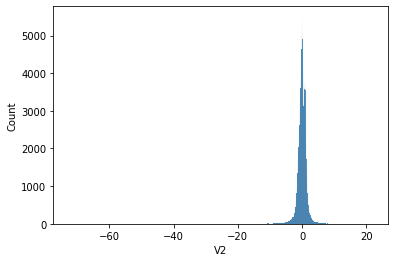

 Min: -48.3255893623954 Max: 9.38255843282114 
 mean: 0.0006300060434147851 std: 1.510376017111705 
 median: 0.178950474188341 
 mode: -2.75204095570008


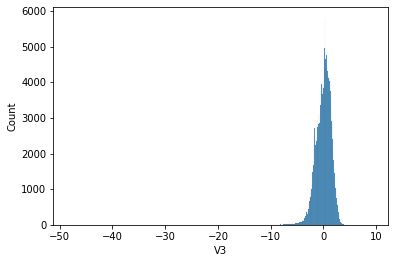

 Min: -5.68317119816995 Max: 16.8753440335975 
 mean: -0.001421570009529377 std: 1.4149656244510016 
 median: -0.0221118581607482 
 mode: -0.842316033286871


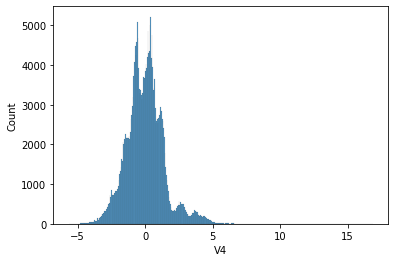

 Min: -113.743306711146 Max: 34.8016658766686 
 mean: 0.0009742278485087669 std: 1.3816434103713453 
 median: -0.0533504003066126 
 mode: 2.46307225982454


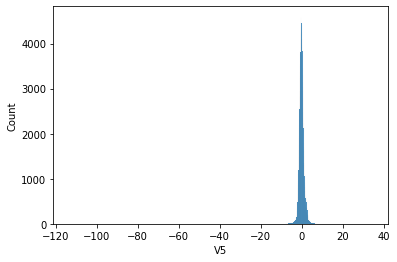

 Min: -26.1605059358433 Max: 73.3016255459646 
 mean: -0.0005867191449633423 std: 1.33322471532955 
 median: -0.274725321333618 
 mode: 3.17385642307029


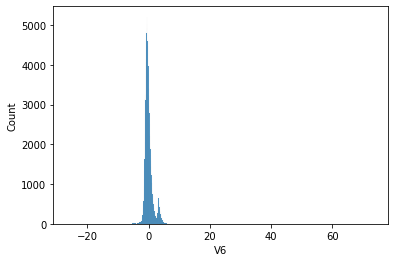

 Min: -43.5572415712451 Max: 120.589493945238 
 mean: 0.0013184214721960552 std: 1.2291811012281215 
 median: 0.0399078016062194 
 mode: -0.432125923987824


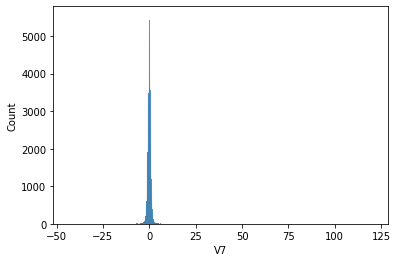

 Min: -73.2167184552674 Max: 20.0072083651213 
 mean: -0.00015878576100100878 std: 1.1742729810299115 
 median: 0.0220765283875171 
 mode: 0.727706200727824


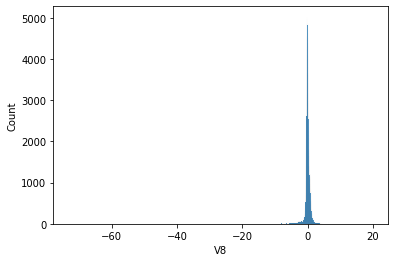

 Min: -13.3201546920984 Max: 15.5949946071278 
 mean: -0.0016186446578048909 std: 1.0947894911134937 
 median: -0.0527947099887042 
 mode: 0.608605870267216


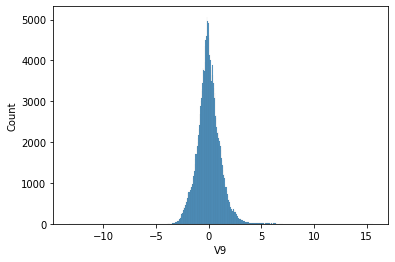

 Min: -24.5882624372475 Max: 23.7451361206545 
 mean: -0.001538947730432538 std: 1.0749724072467108 
 median: -0.0933763691202673 
 mode: -0.0751861699398929


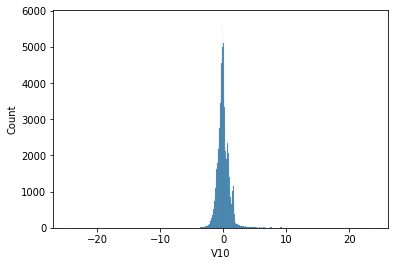

 Min: -4.68293054765276 Max: 12.0189131816199 
 mean: -6.953502895377441e-05 std: 1.018721066653091 
 median: -0.0320437007329808 
 mode: 0.0635044576008839


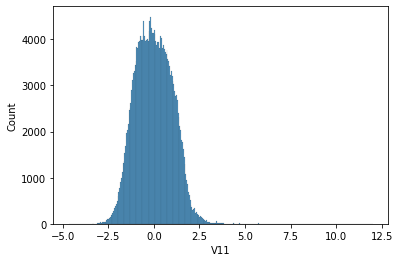

 Min: -18.6837146333443 Max: 7.8483920756446 
 mean: -0.0011350698290197231 std: 0.9967596276707527 
 median: 0.139026433340948 
 mode: 0.350563573253678


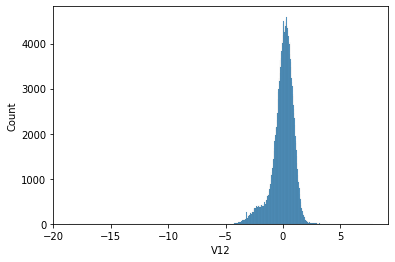

 Min: -5.79188120632084 Max: 7.12688295859376 
 mean: 0.0015700000391235822 std: 0.9958869864393818 
 median: -0.0124875909918943 
 mode: -0.141238322200309


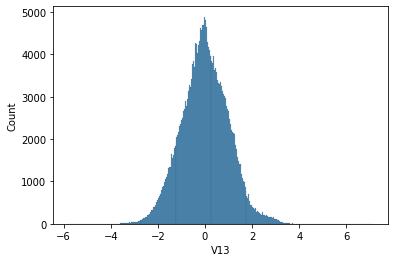

 Min: -19.2143254902614 Max: 10.5267660517847 
 mean: 0.00017154189256378345 std: 0.9542303351333311 
 median: 0.0502015122490897 
 mode: 0.690971618395625


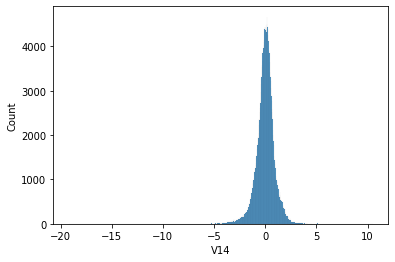

 Min: -4.49894467676621 Max: 8.87774159774277 
 mean: 0.00037414935413595374 std: 0.9151739426457276 
 median: 0.0492622864961284 
 mode: 1.2752570390935


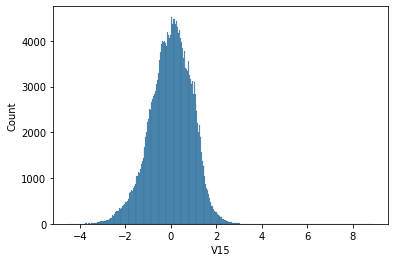

 Min: -14.1298545174931 Max: 17.3151115176278 
 mean: 0.001446572719134871 std: 0.8745992911182078 
 median: 0.0675580829485975 
 mode: -0.371962125028419


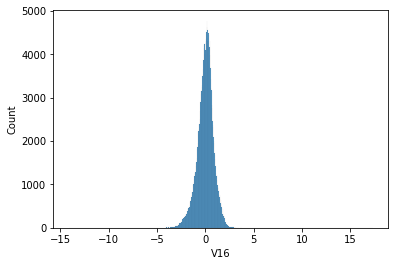

 Min: -25.1627993693248 Max: 9.25352625047285 
 mean: 6.275515587734259e-05 std: 0.8456744299513386 
 median: -0.0665724047632062 
 mode: -0.601956802828445


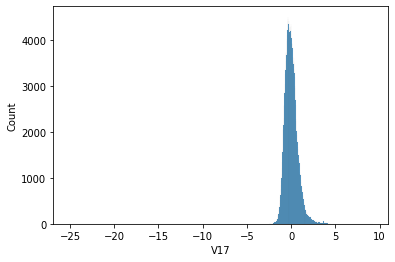

 Min: -9.49874592104677 Max: 5.04106918541184 
 mean: 0.0024428416777250777 std: 0.837565811903333 
 median: -0.0010831407789419 
 mode: -0.0526401462570187


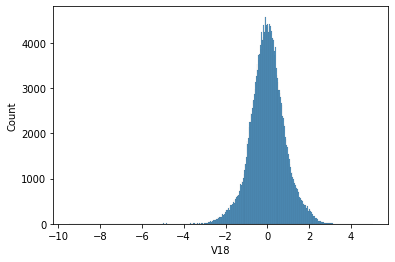

 Min: -7.21352743017759 Max: 5.59197142733558 
 mean: 6.621169979731811e-05 std: 0.8143651258606512 
 median: 0.0037740098658428 
 mode: -0.330590448442944


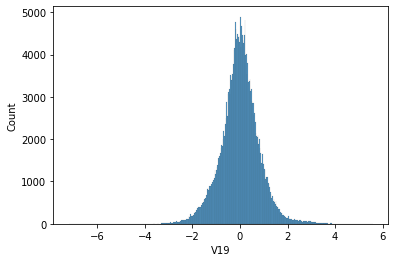

 Min: -54.497720494566 Max: 39.4209042482199 
 mean: 0.00033292634734701887 std: 0.7753554836217419 
 median: -0.0622587700724844 
 mode: -0.180370118559693


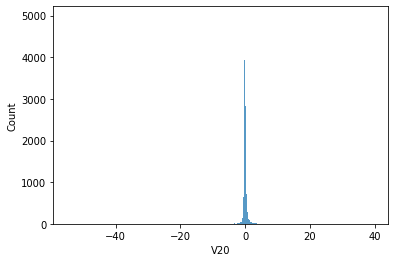

 Min: -34.8303821448146 Max: 27.2028391573154 
 mean: -8.017021223941442e-05 std: 0.7209118679666372 
 median: -0.0296222417147467 
 mode: 0.269764951361357


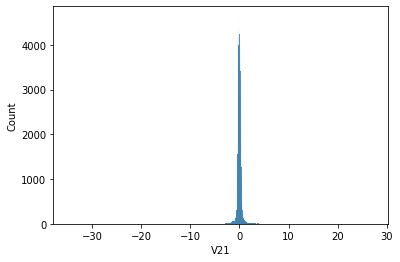

 Min: -10.933143697655 Max: 10.5030900899454 
 mean: -0.0007680865679519904 std: 0.7245677958317014 
 median: 0.0055321203240083 
 mode: 0.844626646775712


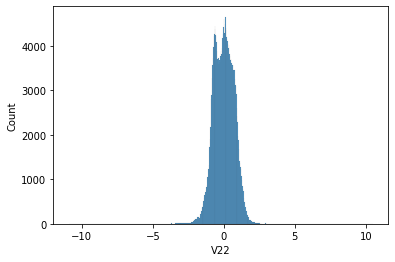

 Min: -44.8077352037913 Max: 22.5284116897749 
 mean: -0.0004590730223251056 std: 0.6317612558170501 
 median: -0.0112443322004434 
 mode: 0.0206746676928111


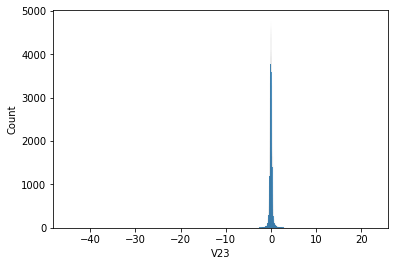

 Min: -2.83662691870341 Max: 4.58454913689817 
 mean: 0.0002270156272122797 std: 0.6059238301928546 
 median: 0.041092601211548 
 mode: 0.726211883811499


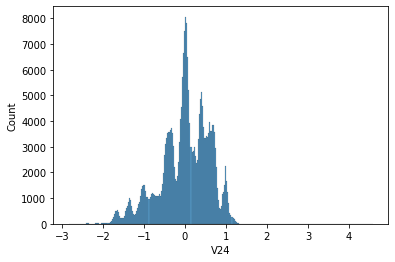

 Min: -10.2953970749851 Max: 7.51958867870916 
 mean: -0.0005635376437960266 std: 0.5217522886759711 
 median: 0.0160808346306451 
 mode: 0.366624307004913


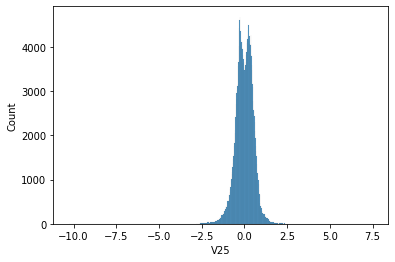

 Min: -2.60455055280817 Max: 3.5173456116238 
 mean: 0.0006255205917304179 std: 0.4826665987988407 
 median: -0.051652792102176 
 mode: -0.398827514959463


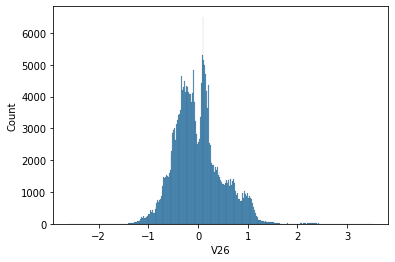

 Min: -22.5656793207827 Max: 31.6121981061363 
 mean: 0.0016657741708781045 std: 0.3966795567963584 
 median: 0.0014267907109938 
 mode: 0.0277351215052822


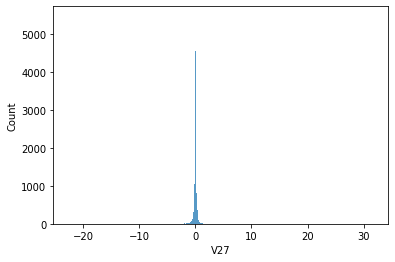

 Min: -15.4300839055349 Max: 33.8478078188831 
 mean: 0.00046661922984005046 std: 0.32952822890756467 
 median: 0.0112666892215974 
 mode: -0.0602821510762213


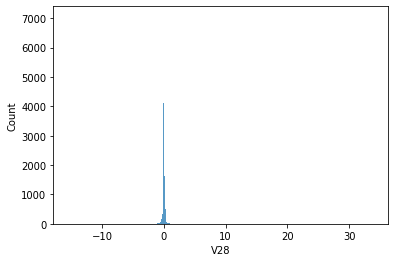

 Min: 0.009950330853168 Max: 7.991025727602329 
 mean: 3.1738355223853865 std: 1.6369075940933333 
 median: 3.1612467120315646 
 mode: 0.6931471805599453


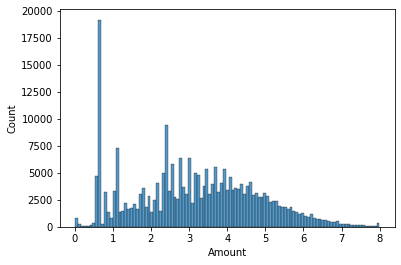

In [27]:
#### univariate analysis
# numeric: now we know dist of each variable
columns = X_train.columns
for col in columns:
    print(' Min:',X_train[col].min(), 'Max:', X_train[col].max(), '\n mean:', X_train[col].mean(), 'std:', X_train[col].std(),'\n', 'median:', X_train[col].median(), '\n', 'mode:', X_train[col].mode()[0])
    sns.histplot(x=X_train[col]) # right skewed with alot outliers
    plt.show()

In [28]:
# time is unskewed
# v1->v28 have normal dist.
# Amount passed on mathmatical transformer + IQR to make it normal dist

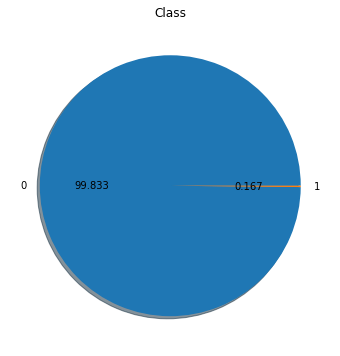

In [29]:
# no categorical except target so lets see if this column is balanced or not
catgorical_feat = ['Class']
for col in catgorical_feat:
    plt.figure(figsize=(6, 6))
    plt.title(col)
    plt.pie(df[col].value_counts(),
           labels=y_train[col].unique(),
            shadow=True,
            autopct='%.3f')
    plt.show()

In [30]:
df['Time'].nunique() # so remove it

124592

### target class is impalanced soln (Experiment 5&6)
**If feature is imbalanced you can remove it or model overfit on some value but if label is imbalanced you must solve it using one of this 3 methods:**

* 1. Undersampling Majority class (lose patterns but good for small dataset)
* 2. Oversampling Minority class (don't lose patterns but overfit)
* 3. SMOTE (generate data from old data)

you can increase test size using method 2 (method 1 remove & method 3 predict values which could be incorrect only choice is method 2) called **upsampling** test to make model have more confidentiality about results

In [31]:
# data imbalanced
from sklearn.feature_selection import RFE, RFECV
from sklearn.utils import resample
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE

### a) Undersampling
* use at large dataset but lose patterns

In [32]:
# solve Target Imbalanced b4 standardScaler

y_train.value_counts()

Class
0        254922
1           431
dtype: int64

In [33]:
y.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [34]:
from imblearn.datasets import make_imbalance # 0:(400 or <= 423) of y_train
X_train_1, y_train_1 = make_imbalance(X_train, y_train, sampling_strategy={0: 400, 1:400}, random_state=5)
X_train_1.shape, y_train_1.shape # 800 records

((800, 30), (800, 1))

In [35]:
y_train_1.value_counts()

Class
0        400
1        400
dtype: int64

### b) Oversampling
* use at small datasets (dont lose patterns) + may overfit

In [36]:
def upsample_classes(data, target):
    # example: 0->800, 1->200, 2->100, 3->300
    lst = list(data[target].unique()) #0,1,2,3
    
    classes = [] # all records in list
    for c in lst:
        classes.append(data[data[target] == c])
    
    length = 0
    class_lab = None
    for c in classes:
        if len(c)>length:
            length=len(c)
            class_lab = c
    class_lab = class_lab[target].unique()[0] # majority_class_label = 0
    
    df_regroup = pd.concat(classes) # all records in df but sorted (0000011223) in df
    maj_class = df_regroup[df_regroup[target] == class_lab] # df contains maj_class (800 record)

    lst.remove(class_lab) # removed majority class and loop on reset -> resample (put dublicates until )
    
    new_classes=[]
    for i in lst:
        new_classes.append(resample(data[data[target] == i], replace=True, n_samples=len(maj_class)))

    minority_classes = pd.concat(new_classes) # 3 class togthers
    upsample = pd.concat([df_regroup[df_regroup[target]==class_lab], minority_classes]) # 3 minority + 1 majority

    return upsample

In [37]:
train = pd.concat([X_train,y_train], axis=1)
train_balanced = (upsample_classes(train, 'Class'))
X_train_2 = train_balanced.drop(['Class'], axis=1)
y_train_2 = train_balanced.Class
X_train_2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,158924,-0.173119,1.162718,-0.762659,-1.585377,1.990236,-0.623928,2.131715,-0.853033,0.163008,...,0.444714,0.054273,0.964644,-0.378451,0.268435,-0.249967,-0.008700,0.109804,-0.288979,0.570980
1,120845,-0.575616,0.938231,-1.352592,-1.918034,2.934739,3.382812,0.521389,0.734186,0.555207,...,0.474272,-0.410561,-0.756785,0.112553,0.677092,-0.328391,0.147514,0.414226,0.068355,2.300583
2,75962,-1.072119,1.673910,0.479374,0.199635,0.602006,-1.036241,0.751126,0.207887,-0.856032,...,-0.171612,0.081155,0.070622,-0.304589,-0.074528,0.387699,-0.463470,-0.153144,0.069452,0.693147
3,77276,1.247064,-0.323916,0.917871,-0.728271,-1.180023,-0.817316,-0.549499,-0.052593,1.769906,...,-0.103991,-0.008406,0.242215,-0.039694,0.418828,0.511633,-0.687742,0.095870,0.036029,0.693147
4,151842,0.403100,0.495212,-0.929136,-1.811098,0.783041,-1.830052,1.397791,-0.699569,-1.913012,...,0.015605,0.562282,1.709910,-0.503745,0.172711,0.546703,0.219862,-0.013204,0.003389,1.791759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215736,169142,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,5.968708
232858,141320,-6.352337,-2.370335,-4.875397,2.335045,-0.809555,-0.413647,-4.082308,2.239089,-1.986360,...,0.186898,1.325218,1.226745,-1.485217,-1.470732,-0.240053,0.112972,0.910591,-0.650944,5.281476
215769,12393,-4.064005,3.100935,-1.188498,3.264633,-1.903562,0.320351,-0.954940,-3.277535,2.820829,...,-0.531898,1.688665,-0.078845,0.193731,0.479496,-0.506603,-0.409863,-3.036271,-0.630605,5.196617
137387,43494,-1.278138,0.716242,-1.143279,0.217805,-1.293890,-1.168952,-2.564182,0.204532,-1.611155,...,0.817203,0.490183,0.470427,-0.126261,-0.126644,-0.661908,-0.349793,0.454851,0.137843,3.254243


In [38]:
X_train_2.shape, y_train_2.shape

((509844, 30), (509844,))

In [39]:
y_train_2.value_counts()

0    254922
1    254922
Name: Class, dtype: int64

In [40]:
X_train_2.duplicated().sum() # half of data is dublicated NOICE

254491

In [41]:
train_balanced.duplicated().sum() # if we removed duplicates length will be (509860 new_df - 254507 duplicates = 255353)
# if you removed duplicates it will return as orignal df which has 255353 records consist of 254930 class 0 and 423 class 1

254491

### c) SMOTE
* generate new data from old data

In [42]:
smote = SMOTE(random_state = 14)

X_train_3, y_train_3 = smote.fit_resample(X_train, y_train)

In [43]:
X_train_3

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,158924,-0.173119,1.162718,-0.762659,-1.585377,1.990236,-0.623928,2.131715,-0.853033,0.163008,...,0.444714,0.054273,0.964644,-0.378451,0.268435,-0.249967,-0.008700,0.109804,-0.288979,0.570980
1,120845,-0.575616,0.938231,-1.352592,-1.918034,2.934739,3.382812,0.521389,0.734186,0.555207,...,0.474272,-0.410561,-0.756785,0.112553,0.677092,-0.328391,0.147514,0.414226,0.068355,2.300583
2,75962,-1.072119,1.673910,0.479374,0.199635,0.602006,-1.036241,0.751126,0.207887,-0.856032,...,-0.171612,0.081155,0.070622,-0.304589,-0.074528,0.387699,-0.463470,-0.153144,0.069452,0.693147
3,77276,1.247064,-0.323916,0.917871,-0.728271,-1.180023,-0.817316,-0.549499,-0.052593,1.769906,...,-0.103991,-0.008406,0.242215,-0.039694,0.418828,0.511633,-0.687742,0.095870,0.036029,0.693147
4,151842,0.403100,0.495212,-0.929136,-1.811098,0.783041,-1.830052,1.397791,-0.699569,-1.913012,...,0.015605,0.562282,1.709910,-0.503745,0.172711,0.546703,0.219862,-0.013204,0.003389,1.791759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509839,57125,-8.160383,3.907547,-8.035265,4.594419,-5.359707,-0.009932,-8.983318,-1.923105,-4.002885,...,0.745939,-1.567372,1.305892,0.793707,-0.558473,-0.243226,-0.212798,0.432432,0.175483,2.176330
509840,56652,-7.407643,2.701273,-7.510991,6.048660,-5.174188,-0.378871,-8.264043,1.164617,-4.373117,...,-0.527197,0.120577,1.017180,0.279806,-0.441266,-0.335636,0.254048,0.439199,-0.078704,4.665330
509841,65150,-1.750939,1.360220,-2.215982,3.129370,-3.948901,1.474562,-0.348519,-2.472316,-1.002052,...,-0.366671,-0.364423,-0.103483,-3.048181,0.390930,-0.554096,-0.123291,1.075773,-0.211073,6.025311
509842,140023,-3.315982,-0.734797,-5.629255,2.262848,-1.950250,0.627948,-1.700240,1.586001,-1.740788,...,1.835606,1.380125,0.923588,0.940303,-1.923009,0.366763,0.154027,0.825985,-0.000644,6.544786


In [44]:
X_train_3.shape, y_train_3.shape

((509844, 30), (509844, 1))

In [45]:
y_train_3.value_counts()

Class
0        254922
1        254922
dtype: int64

In [46]:
X_train_3.duplicated().sum() # half of data is dublicated NOICE

0

In [47]:
# Experiment 5&6
X_train = X_train_1
y_train = y_train_1

---

<AxesSubplot:>

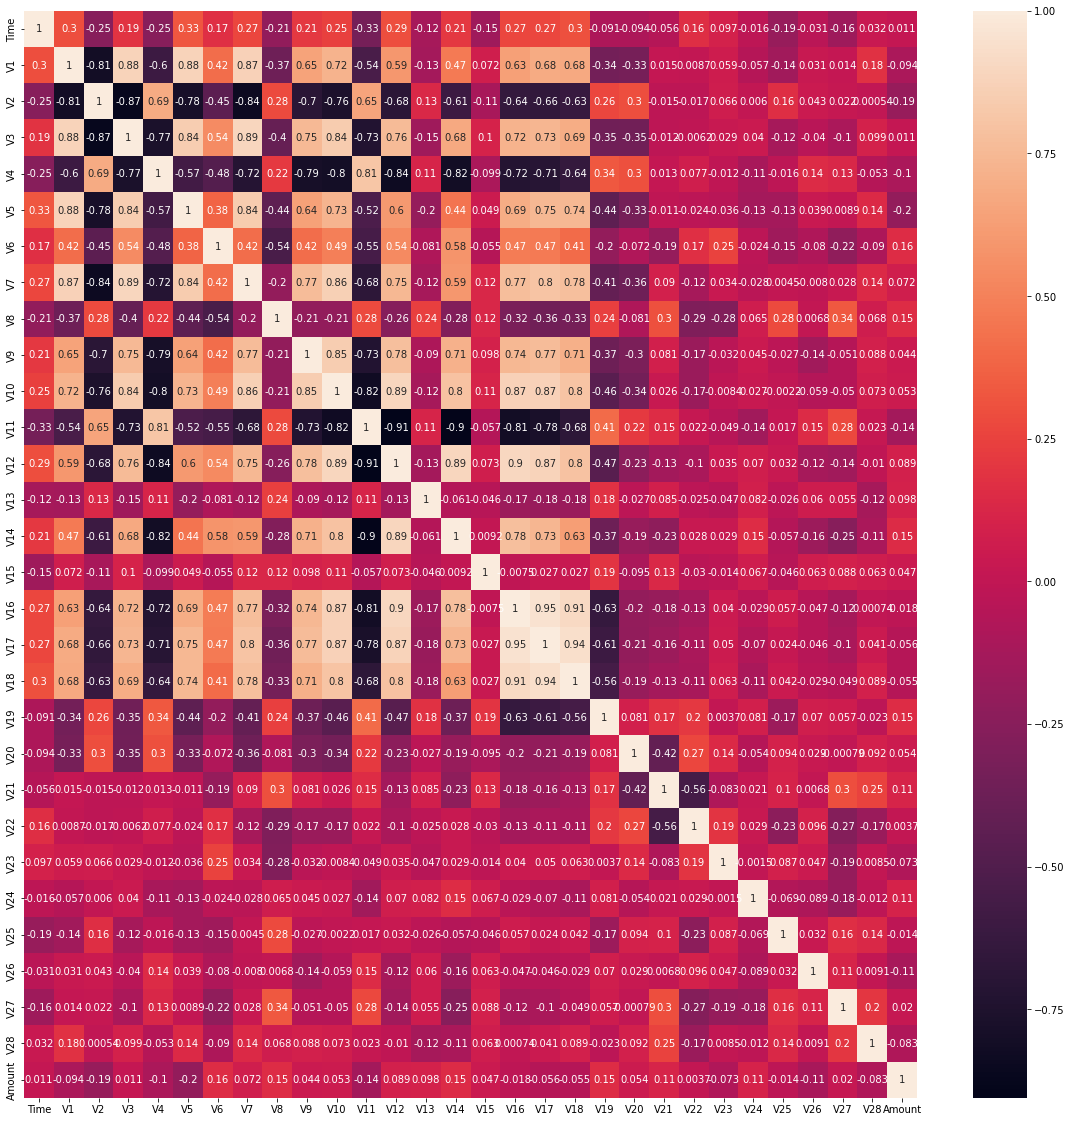

In [48]:
#### bivariate analysis
plt.figure(figsize=(20, 20))
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix, annot=True)

In [49]:
# corr btn -0.45 -> 0.17 so this is good as independant variables don't have relation ship btn each other
corr_matrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.000000,0.296210,-0.250403,0.187730,-0.250987,0.327860,0.171494,0.270149,-0.208920,0.205957,...,-0.093577,-0.055694,0.162258,0.096621,-0.015994,-0.186794,-0.031405,-0.158958,0.032454,0.011030
V1,0.296210,1.000000,-0.812332,0.880820,-0.604427,0.875325,0.419329,0.872077,-0.365922,0.647345,...,-0.325625,0.015003,0.008732,0.058983,-0.056816,-0.143287,0.030987,0.014159,0.176562,-0.094485
V2,-0.250403,-0.812332,1.000000,-0.871714,0.685040,-0.779860,-0.447762,-0.840218,0.282661,-0.695174,...,0.299886,-0.014769,-0.017114,0.065747,0.005951,0.161250,0.043094,0.022381,0.000543,-0.189071
V3,0.187730,0.880820,-0.871714,1.000000,-0.770862,0.843911,0.544865,0.888844,-0.402975,0.749783,...,-0.350284,-0.012402,-0.006202,0.029001,0.040089,-0.123728,-0.039936,-0.100564,0.099308,0.010693
V4,-0.250987,-0.604427,0.685040,-0.770862,1.000000,-0.572752,-0.483603,-0.718971,0.216937,-0.787522,...,0.300742,0.012678,0.076750,-0.011999,-0.112487,-0.016106,0.144148,0.125382,-0.052920,-0.100446
V5,0.327860,0.875325,-0.779860,0.843911,-0.572752,1.000000,0.380534,0.842858,-0.441741,0.640453,...,-0.326213,-0.011367,-0.024142,-0.035905,-0.126209,-0.129000,0.038671,0.008930,0.143069,-0.202143
V6,0.171494,0.419329,-0.447762,0.544865,-0.483603,0.380534,1.000000,0.417111,-0.535614,0.418566,...,-0.071880,-0.193923,0.171852,0.250467,-0.024371,-0.147343,-0.079887,-0.216948,-0.089775,0.158913
V7,0.270149,0.872077,-0.840218,0.888844,-0.718971,0.842858,0.417111,1.000000,-0.198678,0.766861,...,-0.363701,0.089993,-0.120591,0.034386,-0.028296,0.004488,-0.007983,0.028376,0.138179,0.072493
V8,-0.208920,-0.365922,0.282661,-0.402975,0.216937,-0.441741,-0.535614,-0.198678,1.000000,-0.210804,...,-0.080907,0.304023,-0.288658,-0.282014,0.064683,0.284775,0.006840,0.335509,0.068013,0.154363
V9,0.205957,0.647345,-0.695174,0.749783,-0.787522,0.640453,0.418566,0.766861,-0.210804,1.000000,...,-0.304271,0.080918,-0.170252,-0.032306,0.045089,-0.026668,-0.140511,-0.051251,0.087806,0.044014


In [50]:
# corr > 0.9 are
for col in corr_matrix.columns:
    corr_matrix[col] = corr_matrix[col].map(lambda p: abs(p) > 0.9)
np.sum(np.sum(corr_matrix)) # so there are columns corrleated

40

In [51]:
dicto = {}
for col in corr_matrix.columns:
    dicto[str(col)] = corr_matrix.iloc[list(corr_matrix[col]), :].index
dicto # dicto says no corr betwen features and whole data so no corr columns to remove

{'Time': Index(['Time'], dtype='object'),
 'V1': Index(['V1'], dtype='object'),
 'V2': Index(['V2'], dtype='object'),
 'V3': Index(['V3'], dtype='object'),
 'V4': Index(['V4'], dtype='object'),
 'V5': Index(['V5'], dtype='object'),
 'V6': Index(['V6'], dtype='object'),
 'V7': Index(['V7'], dtype='object'),
 'V8': Index(['V8'], dtype='object'),
 'V9': Index(['V9'], dtype='object'),
 'V10': Index(['V10'], dtype='object'),
 'V11': Index(['V11', 'V12'], dtype='object'),
 'V12': Index(['V11', 'V12', 'V16'], dtype='object'),
 'V13': Index(['V13'], dtype='object'),
 'V14': Index(['V14'], dtype='object'),
 'V15': Index(['V15'], dtype='object'),
 'V16': Index(['V12', 'V16', 'V17', 'V18'], dtype='object'),
 'V17': Index(['V16', 'V17', 'V18'], dtype='object'),
 'V18': Index(['V16', 'V17', 'V18'], dtype='object'),
 'V19': Index(['V19'], dtype='object'),
 'V20': Index(['V20'], dtype='object'),
 'V21': Index(['V21'], dtype='object'),
 'V22': Index(['V22'], dtype='object'),
 'V23': Index(['V23'], dty

In [52]:
X_train[col].sample(400, random_state=32)

479    4.817698
199    1.383791
144    5.707110
283    0.783902
380    0.565314
         ...   
351    0.693147
566    4.110874
687    6.581748
376    2.396986
312    3.292126
Name: Amount, Length: 400, dtype: float64

In [53]:
y_train['Class'].sample(400, random_state=32)

479    1
199    0
144    0
283    0
380    0
      ..
351    0
566    1
687    1
376    0
312    0
Name: Class, Length: 400, dtype: int64

In [54]:
# target is boolean so it's like categorical
# num vs cat so use swarm plot

# but i won't use it as class imbalanced and i know that 99% of data is already in class 0
# columns = X_train.columns
# for col in columns:
#     sns.swarmplot(x=X_train[col].sample(4000, random_state=32), y = y_train['Class'].sample(4000, random_state=32))
#     plt.show()

In [55]:
# multivariate
# plt.figure(figsize=(20, 20))
# sns.pairplot(X_train.sample(100, random_state=32))

The Above Graph means features are not correlated

**Notes:**
* 1) dtypes are clear, No errors (-ve, 0, ####, ?) in data

* 2) X_train & X_test have no NaNs (imputed), no duplicates, no outliers & good dist of X_train['Amount']

* 3) features are normaly dist + independant variables (features) are not correlated. **but target is class imbalanced**

next_step: solve imbalanced target class

# 4) Encoding
* 1) convert boolean (False -> 0, True -> 1) and break Texts
* 2) Ordinal and Nominal (**high cardinalities** -> (freq encoder or remove column) or **low cardinalities** -> (OrdinalEncoder - OneHotEncoder=pd.dummies)) and **Target Encoding** (label encoder encode alphabitcally)

In [56]:
# no boolean (it's numeric so its good (0, 1)) binary classification so no need for 1 hot encoding
# no Texts 'string of words' to break -> 'string', 'of', 'words'
# no categorical features so no low/high cardinalites and target is already encoded
# that's why no cells here

# 5) Feature Engineering

Note: **StandardScaler First for clusters_feature or PCA or modeling**

* 1) K_means cluster to get new feature (unsupervised learning) -> no need to cluster as target already clustered data (Experiment 3&4)

* 2) PCA to make dimension reduction (unsupervised learning) -> no need as data already has PCA

* 3) Select Features have MI > 0.2 or percentile

* 4) Add new features after you make baseline model First (2b2a 2ablnye lw 3mltha)

In [57]:
# standard scaler as features not in same range + mean!=0, std!=1
std_scale = StandardScaler()
X_train = X_train.drop(['Time'], axis=1)
X_test = X_test.drop(['Time'], axis=1)

columns = X_train.columns

X_train = std_scale.fit_transform(X_train)
X_test = std_scale.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.243901,-1.085526,0.803349,-0.889512,0.094592,-0.178652,0.292732,-0.021129,0.398392,0.571511,...,-0.511842,-0.121369,-0.011187,-0.948602,1.533338,0.148252,-1.014527,-0.692819,-1.582923,0.793731
1,0.613024,-0.519455,0.630389,-0.255452,0.302100,0.435795,0.462825,-0.108411,0.650911,0.651110,...,-0.378687,-0.166303,-0.066785,-0.018007,0.429607,0.761516,-0.805176,-0.121707,-0.068638,0.420216
2,0.322130,-0.125912,0.392257,-0.505699,0.760126,3.302945,-0.075868,-1.219547,0.222749,0.263587,...,1.303206,-1.458184,0.929520,-0.024097,1.593401,1.030699,-0.228471,0.044032,0.685861,0.540419
3,0.629804,-0.534968,0.539170,-0.695049,0.340731,-0.022990,0.535134,-0.199361,0.408237,0.634347,...,-0.062078,-0.344942,-1.448628,0.115034,0.138366,0.092665,1.232275,-0.282407,-0.085550,0.757504
4,0.639197,-0.427679,0.606640,-0.516862,0.357528,0.271281,0.458461,-0.134485,0.449730,0.599588,...,-0.285106,-0.262439,-0.676653,0.171565,0.047940,0.133385,0.149401,-0.156518,-0.054913,-1.255781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-0.552166,0.408811,-0.268656,0.016064,-0.589724,0.053259,-0.056294,0.248579,-0.705961,0.149772,...,-2.060305,0.471446,-1.135433,0.730636,0.184524,-0.614706,3.933344,-2.137468,-0.303065,1.290572
796,0.544769,0.373115,-0.399082,1.167020,0.433735,-0.434191,-0.022296,0.020515,-0.967186,-0.445474,...,0.362954,0.023842,-1.065074,0.039006,-1.597497,0.302916,-0.219438,0.791156,0.960337,-0.539525
797,0.429345,-0.128369,0.676857,0.131650,0.721590,0.743838,0.672531,-0.188673,-0.198486,0.932191,...,-0.325428,-0.029511,0.777447,-0.123615,1.410726,-0.251627,-0.240546,-0.486765,-0.649985,-0.962574
798,0.260998,0.279943,-0.456975,0.262847,-0.417792,-0.747238,-0.214860,0.234305,-0.566253,-0.405427,...,0.122682,0.448991,0.818790,0.220804,0.135384,-0.027946,1.203785,0.010245,-0.524689,0.940547


#### Elpow method to chose k for k_means

In [58]:
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 35)
# distortion: distance between centers 
# inertia: distance of same sample
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_train)
  
    distortions.append(sum(np.min(cdist(X_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train.shape[0]) 
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train.shape[0]
    mapping2[k] = kmeanModel.inertia_

print('distortion values:')
for key, val in mapping1.items():
    print(f'{key} : {val}')
print()
print('inertia values:')
for key, val in mapping2.items():
    print(f'{key} : {val}')

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than

distortion values:
1 : 4.714303065313831
2 : 3.9826617352169262
3 : 3.67968796008783
4 : 3.6154543537261787
5 : 3.4810340232871506
6 : 3.3915407142211627
7 : 3.338436361109726
8 : 3.2549950818589224
9 : 3.2321237871010893
10 : 3.1549479953061708
11 : 3.09960161539792
12 : 3.0824895022212964
13 : 3.042939148174156
14 : 3.0458628701450805
15 : 2.952159035633729
16 : 2.91314063423504
17 : 2.8714499117903047
18 : 2.8526455642270245
19 : 2.810085075762759
20 : 2.794557163399633
21 : 2.778263731526589
22 : 2.7470945594247707
23 : 2.7110517175797337
24 : 2.7250636551600356
25 : 2.681326069178206
26 : 2.659028236415715
27 : 2.655005127742109
28 : 2.6255987362304922
29 : 2.6048622496087592
30 : 2.60357949818937
31 : 2.582912618819482
32 : 2.55911942828938
33 : 2.5567928424540862
34 : 2.555526666714084

inertia values:
1 : 23200.0
2 : 15917.880355378365
3 : 13960.998860695587
4 : 12717.48867486772
5 : 12102.107449855299
6 : 11317.537555862953
7 : 10806.823807035968
8 : 10446.966469937874
9 : 995

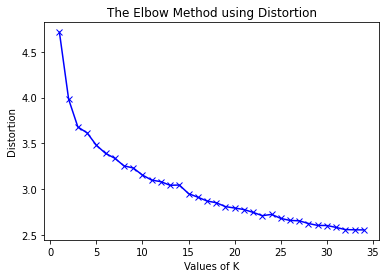

In [59]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

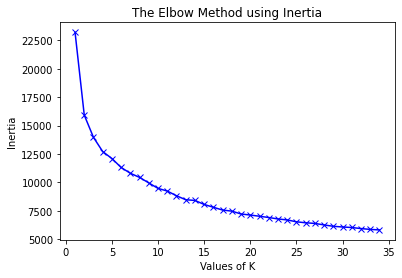

In [60]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [61]:
# 1) KMeans: 20 is good value
# Experiments 3&4
kmeans = KMeans(n_clusters=20, random_state=5) # hyperparameter !! Try and Error (Experiments 3&4) 1 -> 23 (12)

X_train["Cluster"] = kmeans.fit_predict(X_train)
X_test["Cluster"] = kmeans.predict(X_test) # prevent data leakage

X_train["Cluster"] = X_train["Cluster"].astype("int32")
X_test["Cluster"] = X_test["Cluster"].astype("int32")

X_train

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Cluster
0,-0.243901,-1.085526,0.803349,-0.889512,0.094592,-0.178652,0.292732,-0.021129,0.398392,0.571511,...,-0.121369,-0.011187,-0.948602,1.533338,0.148252,-1.014527,-0.692819,-1.582923,0.793731,9
1,0.613024,-0.519455,0.630389,-0.255452,0.302100,0.435795,0.462825,-0.108411,0.650911,0.651110,...,-0.166303,-0.066785,-0.018007,0.429607,0.761516,-0.805176,-0.121707,-0.068638,0.420216,18
2,0.322130,-0.125912,0.392257,-0.505699,0.760126,3.302945,-0.075868,-1.219547,0.222749,0.263587,...,-1.458184,0.929520,-0.024097,1.593401,1.030699,-0.228471,0.044032,0.685861,0.540419,5
3,0.629804,-0.534968,0.539170,-0.695049,0.340731,-0.022990,0.535134,-0.199361,0.408237,0.634347,...,-0.344942,-1.448628,0.115034,0.138366,0.092665,1.232275,-0.282407,-0.085550,0.757504,4
4,0.639197,-0.427679,0.606640,-0.516862,0.357528,0.271281,0.458461,-0.134485,0.449730,0.599588,...,-0.262439,-0.676653,0.171565,0.047940,0.133385,0.149401,-0.156518,-0.054913,-1.255781,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-0.552166,0.408811,-0.268656,0.016064,-0.589724,0.053259,-0.056294,0.248579,-0.705961,0.149772,...,0.471446,-1.135433,0.730636,0.184524,-0.614706,3.933344,-2.137468,-0.303065,1.290572,4
796,0.544769,0.373115,-0.399082,1.167020,0.433735,-0.434191,-0.022296,0.020515,-0.967186,-0.445474,...,0.023842,-1.065074,0.039006,-1.597497,0.302916,-0.219438,0.791156,0.960337,-0.539525,8
797,0.429345,-0.128369,0.676857,0.131650,0.721590,0.743838,0.672531,-0.188673,-0.198486,0.932191,...,-0.029511,0.777447,-0.123615,1.410726,-0.251627,-0.240546,-0.486765,-0.649985,-0.962574,9
798,0.260998,0.279943,-0.456975,0.262847,-0.417792,-0.747238,-0.214860,0.234305,-0.566253,-0.405427,...,0.448991,0.818790,0.220804,0.135384,-0.027946,1.203785,0.010245,-0.524689,0.940547,11


In [62]:
# 2) No PCA

In [63]:
std_scale_cluster = StandardScaler()

columns = X_train.columns

listo = np.array(X_train['Cluster']).reshape(-1, 1) # added 1 more axis to pass to std_scaler
listo_test = np.array(X_test['Cluster']).reshape(-1, 1)
X_train['Cluster'] = std_scale_cluster.fit_transform(listo)
X_test['Cluster'] = std_scale_cluster.transform(listo_test)

X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Cluster
0,-0.243901,-1.085526,0.803349,-0.889512,0.094592,-0.178652,0.292732,-0.021129,0.398392,0.571511,...,-0.121369,-0.011187,-0.948602,1.533338,0.148252,-1.014527,-0.692819,-1.582923,0.793731,0.086904
1,0.613024,-0.519455,0.630389,-0.255452,0.302100,0.435795,0.462825,-0.108411,0.650911,0.651110,...,-0.166303,-0.066785,-0.018007,0.429607,0.761516,-0.805176,-0.121707,-0.068638,0.420216,1.655088
2,0.322130,-0.125912,0.392257,-0.505699,0.760126,3.302945,-0.075868,-1.219547,0.222749,0.263587,...,-1.458184,0.929520,-0.024097,1.593401,1.030699,-0.228471,0.044032,0.685861,0.540419,-0.610067
3,0.629804,-0.534968,0.539170,-0.695049,0.340731,-0.022990,0.535134,-0.199361,0.408237,0.634347,...,-0.344942,-1.448628,0.115034,0.138366,0.092665,1.232275,-0.282407,-0.085550,0.757504,-0.784310
4,0.639197,-0.427679,0.606640,-0.516862,0.357528,0.271281,0.458461,-0.134485,0.449730,0.599588,...,-0.262439,-0.676653,0.171565,0.047940,0.133385,0.149401,-0.156518,-0.054913,-1.255781,-1.307038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-0.552166,0.408811,-0.268656,0.016064,-0.589724,0.053259,-0.056294,0.248579,-0.705961,0.149772,...,0.471446,-1.135433,0.730636,0.184524,-0.614706,3.933344,-2.137468,-0.303065,1.290572,-0.784310
796,0.544769,0.373115,-0.399082,1.167020,0.433735,-0.434191,-0.022296,0.020515,-0.967186,-0.445474,...,0.023842,-1.065074,0.039006,-1.597497,0.302916,-0.219438,0.791156,0.960337,-0.539525,-0.087339
797,0.429345,-0.128369,0.676857,0.131650,0.721590,0.743838,0.672531,-0.188673,-0.198486,0.932191,...,-0.029511,0.777447,-0.123615,1.410726,-0.251627,-0.240546,-0.486765,-0.649985,-0.962574,0.086904
798,0.260998,0.279943,-0.456975,0.262847,-0.417792,-0.747238,-0.214860,0.234305,-0.566253,-0.405427,...,0.448991,0.818790,0.220804,0.135384,-0.027946,1.203785,0.010245,-0.524689,0.940547,0.435389


In [64]:
X_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Cluster
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,800.000000,8.000000e+02,8.000000e+02,8.000000e+02,...,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,800.000000,8.000000e+02,8.000000e+02,8.000000e+02
mean,7.105427e-17,-7.105427e-17,-3.552714e-17,-1.421085e-16,3.552714e-17,7.105427e-17,0.000000,1.776357e-17,7.105427e-17,1.776357e-16,...,-1.776357e-17,-6.661338e-18,-2.220446e-17,-8.881784e-18,2.664535e-17,1.776357e-17,0.000000,-1.776357e-17,4.440892e-17,-1.065814e-16
std,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626,1.000626e+00,1.000626e+00,1.000626e+00,...,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626,1.000626e+00,1.000626e+00,1.000626e+00
min,-5.299120e+00,-4.576019e+00,-4.530324e+00,-1.987729e+00,-4.972062e+00,-3.358449e+00,-7.544999,-1.056903e+01,-5.371057e+00,-5.019647e+00,...,-1.233691e+01,-9.634943e+00,-1.701460e+01,-3.461055e+00,-7.010761e+00,-2.522431e+00,-6.638214,-4.744120e+00,-1.613409e+00,-1.481281e+00
25%,-9.739884e-02,-5.380143e-01,-2.700651e-01,-7.469261e-01,-6.412793e-02,-5.287717e-01,-0.062229,-1.995911e-01,-4.610966e-01,-4.061993e-01,...,-2.278830e-01,-5.844658e-01,-1.623179e-01,-6.199769e-01,-4.857335e-01,-6.797649e-01,-0.220724,-2.376058e-01,-1.042851e+00,-7.843101e-01
50%,2.857176e-01,-2.425207e-01,3.484121e-01,-3.063278e-01,2.766194e-01,2.924803e-02,0.357403,-1.050010e-01,2.608984e-01,4.342193e-01,...,-7.248089e-02,-8.567808e-03,1.937703e-02,9.993401e-02,3.873310e-02,-8.048471e-02,-0.093039,-1.108687e-02,3.478764e-02,-8.733917e-02
75%,6.061080e-01,2.966547e-01,6.294686e-01,6.126491e-01,4.894845e-01,4.627080e-01,0.524055,6.878401e-02,6.490302e-01,6.282450e-01,...,1.927300e-01,5.898794e-01,2.209032e-01,7.582541e-01,5.286254e-01,6.663149e-01,0.377015,4.375328e-01,8.149883e-01,9.581173e-01
max,8.532323e-01,5.882013e+00,1.070701e+00,3.068402e+00,3.069187e+00,4.261002e+00,1.942474,4.926559e+00,2.696040e+00,2.602199e+00,...,1.438654e+01,8.919898e+00,4.887369e+00,2.338686e+00,3.170921e+00,5.763967e+00,3.340171,4.308140e+00,2.595260e+00,1.829331e+00


In [65]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [66]:
# 3) MI scores to select relevent features
mi_scores = make_mi_scores(X_train, y_train['Class'], discrete_features=False)
mi_scores

V14        0.475305
Cluster    0.455165
V10        0.452220
V17        0.443182
V12        0.406430
V11        0.397310
V4         0.366714
V3         0.348905
V16        0.318181
V7         0.303572
V2         0.273516
V21        0.239938
V9         0.232824
V18        0.197742
V27        0.194859
V6         0.189890
V1         0.189057
V28        0.169787
V5         0.163654
Amount     0.158930
V8         0.133081
V19        0.125250
V20        0.119049
V24        0.043339
V23        0.041323
V26        0.030994
V25        0.011453
V15        0.000000
V22        0.000000
V13        0.000000
Name: MI Scores, dtype: float64

In [67]:
# 4) I won't add features hya kda

**Notes:**

* Target Imbalanced done b4 standardScaler (you could upsampling test also gives more confident on results)

# 6) Modeling

**Underfit soln**: more complex (increase layers/units) - more points - search for another arch 

**Overfit soln**: regularization - more points (un-biased / augmentation) - search for another arch

* 1) Try all calssification model get best baseline acc
* 2) hyperparameters tunning (random + gridsearch)
* 3) Evalution metric to descide which is best
* 4) Try all experiments you want to make

In [68]:
# Logestic_regreesion - SVM - Naive Bayes classifier - DT - (Boosting)RF - (Boosting)XGBoost - KNN => Classifcation

In [69]:
def classification_result(y_test, y_pred, prob, plot_roc=True):
    print('Test Accuracy:', accuracy_score(y_test, y_pred) * 100)
    print('F1 score:', f1_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))
    clf_report = classification_report(y_test, y_pred, target_names=['Transaction','Fraud'], output_dict=True)
    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
    plt.show()
    print()
    print()
    print()
    
    if plot_roc == True:
        #curve of TPR vs FPR on Ytest vs predictions of knn_model
        plt.style.use('seaborn') #use seaborn style
        fpr, tpr, thershold = roc_curve(y_test, prob)
        # auc_value = roc_auc_score(y_test, y_pred)
        auc_value = auc(fpr, tpr)
        template_str = "AUC = {}".format(auc_value)
        #plot
        plt.plot(fpr, tpr, 'g-', label="AUC = %0.2f" % auc_value)
        #properties
        plt.grid()
        plt.legend(loc = 'lower right')
        plt.xlabel("False Postive Rate")
        plt.ylabel("True Postive Rate")
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.title('Receiver Operating Characteristic')
        plt.show()

In [70]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

#### XGBoost Model

In [71]:
xgbc = XGBClassifier(random_state=5)
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=5,
              reg_alpha=0, reg_lambda=1, ...)

In [72]:
scores = cross_val_score(xgbc, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.94


In [73]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.94


In [74]:
y_pred = xgbc.predict(X_test)
y_pred # prediction on all X_test

array([0, 0, 0, ..., 0, 0, 0])

In [75]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('\n clasification report:\n', classification_report(y_test, y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.9593275296937229
F1 score: 0.06482982171799027
Recall: 0.9523809523809523
Precision: 0.03355704697986577

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     28331
           1       0.03      0.95      0.06        42

    accuracy                           0.96     28373
   macro avg       0.52      0.96      0.52     28373
weighted avg       1.00      0.96      0.98     28373


 confussion matrix:
 [[27179  1152]
 [    2    40]]


Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.


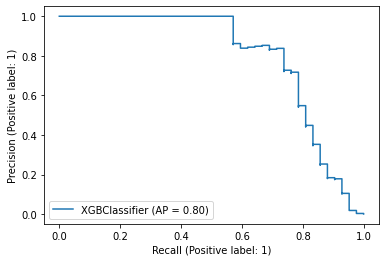

In [76]:
# (As precision increase recall decrease)

# Plotting Precision-Recall Curve 
disp = plot_precision_recall_curve(xgbc, X_test, y_test)

In [77]:
y_pred_prob = xgbc.predict_proba(X_test)
y_pred_prob

array([[9.8096293e-01, 1.9037075e-02],
       [9.9953890e-01, 4.6111658e-04],
       [9.6177983e-01, 3.8220182e-02],
       ...,
       [9.9787110e-01, 2.1289182e-03],
       [9.9865764e-01, 1.3423720e-03],
       [9.9986309e-01, 1.3689543e-04]], dtype=float32)

In [78]:
y_pred_prob[:, 1] # to get prediction of class 1 , as problem is class 1 or not class 1 (class 0)

# if problem is 3 classes (class 0, class 1, class 2):
# so draw ROC curve for class 1 & class 2 (class 0 is not class 1 & not class 2).

array([0.01903708, 0.00046112, 0.03822018, ..., 0.00212892, 0.00134237,
       0.0001369 ], dtype=float32)

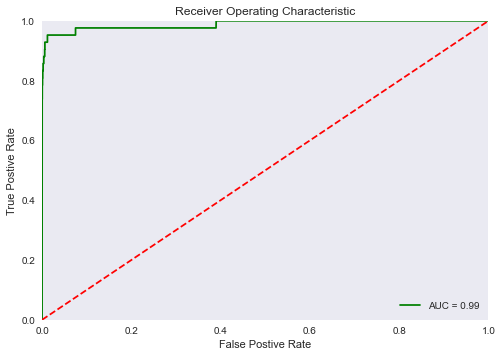

In [79]:
#curve of TPR vs FPR on Ytest vs predictions of knn_model
plt.style.use('seaborn') #use seaborn style
y_pred_prob = xgbc.predict_proba(X_test)
prob = y_pred_prob[:, 1]
fpr, tpr, thershold = roc_curve(y_test, prob)
# auc_value = roc_auc_score(y_test, y_pred)
auc_value = auc(fpr, tpr)
template_str = "AUC = {}".format(auc_value)
#plot
plt.plot(fpr, tpr, 'g-', label="AUC = %0.2f" % auc_value)
#properties
plt.grid()
plt.legend(loc = 'lower right')
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('Receiver Operating Characteristic')
plt.show()

In [80]:
roc_auc_score(y_test['Class'], prob) # but use auc

0.9881011209326482

<AxesSubplot:>

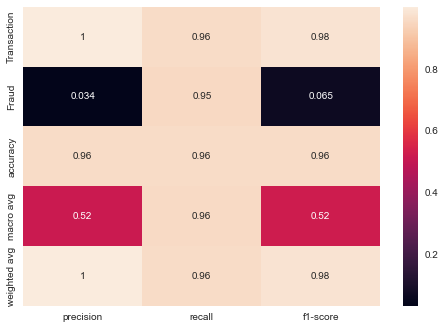

In [81]:
#detailed report on knn_model on testing data
clf_report = classification_report(y_test, y_pred, target_names=['Transaction','Fraud'], output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

#### 1) XGBoost model

Accuracy: 0.9593275296937229
F1 score: 0.06482982171799027
Recall: 0.9523809523809523
Precision: 0.03355704697986577

 confussion matrix:
 [[27179  1152]
 [    2    40]]


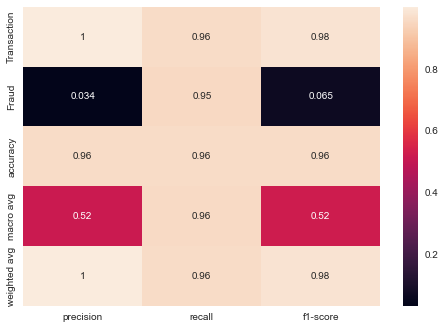

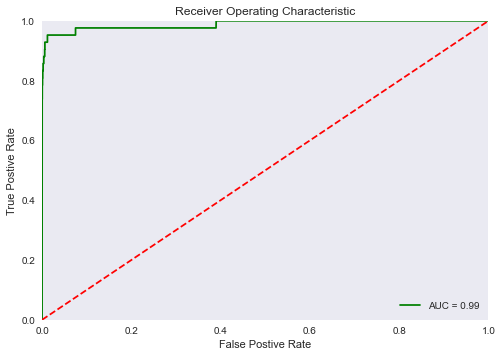

In [82]:
xgbc = XGBClassifier(random_state=5)
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)
y_pred_prob = xgbc.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result(y_test, y_pred, prob)

#### 2) Knn model

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy: 0.9701829203820533
F1 score: 0.0824295010845987
Recall: 0.9047619047619048
Precision: 0.04318181818181818

 confussion matrix:
 [[27489   842]
 [    4    38]]


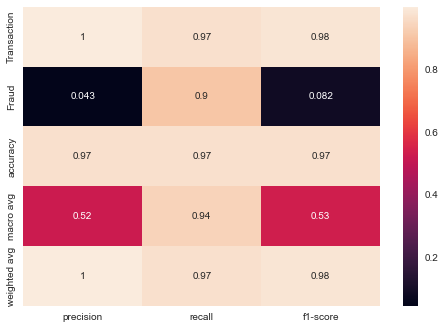

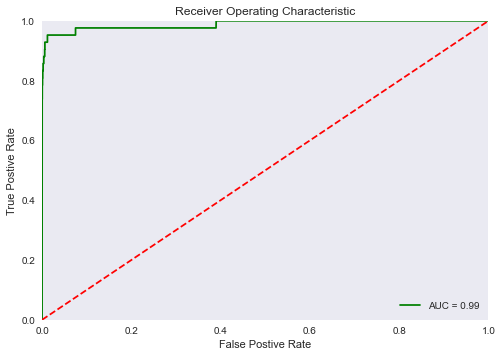

In [83]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_prob = xgbc.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result(y_test, y_pred, prob)

#### 3) RF

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy: 0.9672223592852359
F1 score: 0.07920792079207921
Recall: 0.9523809523809523
Precision: 0.04132231404958678

 confussion matrix:
 [[27403   928]
 [    2    40]]


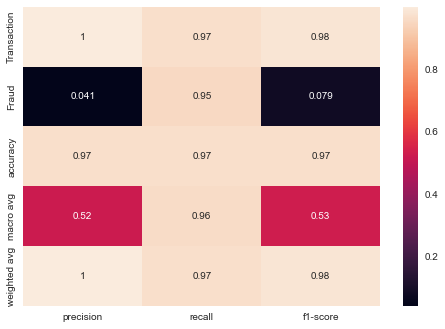

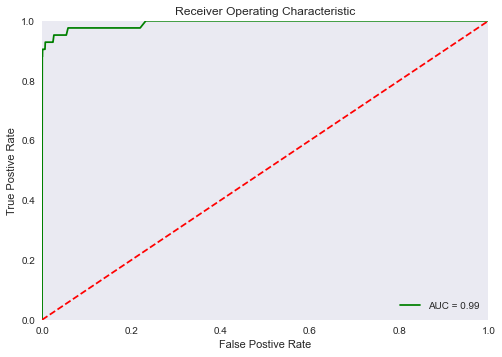

In [84]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result(y_test, y_pred, prob)

#### 4) DT

Accuracy: 0.8884150424699538
F1 score: 0.02404438964241677
Recall: 0.9285714285714286
Precision: 0.012179887570268583

 confussion matrix:
 [[25168  3163]
 [    3    39]]


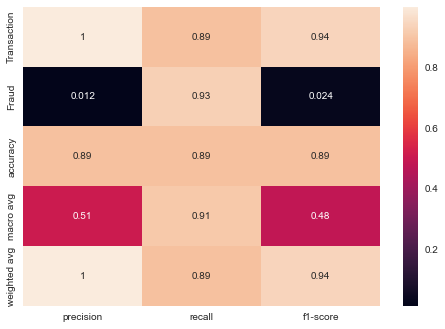

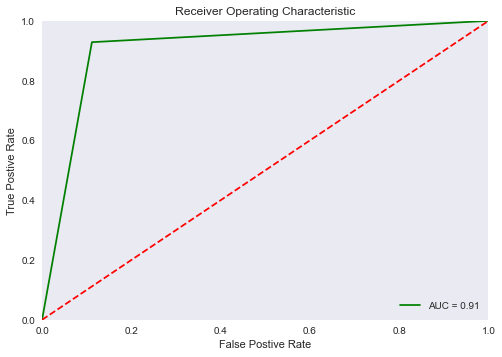

In [85]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
y_pred = DT_model.predict(X_test)
y_pred_prob = DT_model.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result(y_test, y_pred, prob)

#### 5) Naive Bayes classifier

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Accuracy: 0.9622880907905403
F1 score: 0.06468531468531469
Recall: 0.8809523809523809
Precision: 0.03357531760435572

 confussion matrix:
 [[27266  1065]
 [    5    37]]


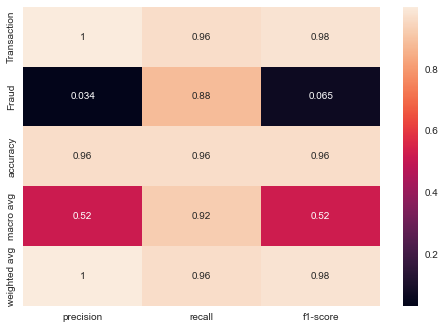

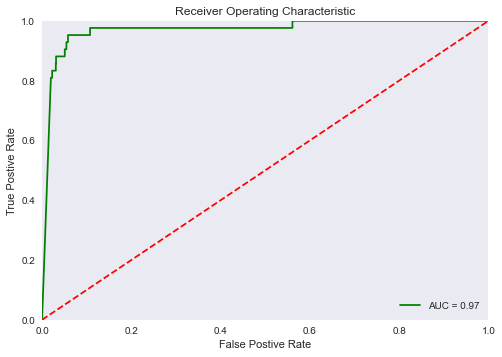

In [86]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
y_pred = NB_model.predict(X_test)
y_pred_prob = NB_model.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result(y_test, y_pred, prob)

#### 6) SVM

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Accuracy: 0.9786769111479223
F1 score: 0.11678832116788322
Recall: 0.9523809523809523
Precision: 0.06220839813374806

 confussion matrix:
 [[27728   603]
 [    2    40]]


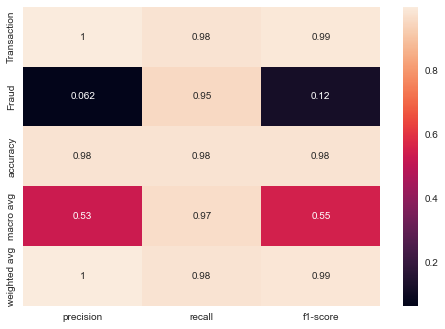

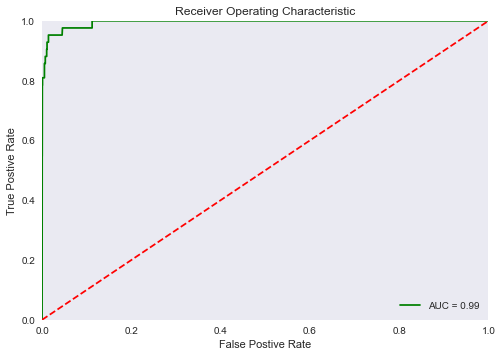

In [87]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
y_pred_prob = svm_model.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result(y_test, y_pred, prob, plot_roc=True)

#### 7) Logestic_regreesion

Accuracy: 0.9664469742360695


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


F1 score: 0.07930367504835589
Recall: 0.9761904761904762
Precision: 0.04133064516129032

 confussion matrix:
 [[27380   951]
 [    1    41]]


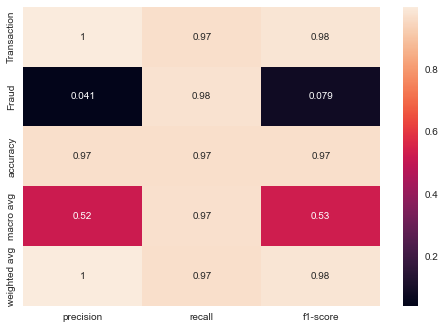

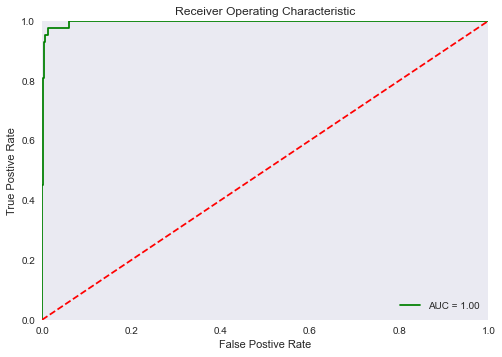

In [88]:
logestic_model = LogisticRegression()
logestic_model.fit(X_train, y_train)
y_pred = logestic_model.predict(X_test)
y_pred_prob = logestic_model.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result(y_test, y_pred, prob, plot_roc=True)

**Notes:**

Naive, DT, RF, KNN, SVM, XGBoost wont be used based Recall & Confusion matrx & F1score so we will use **logestic regression**

---

### Hyperparamter tunning using GridSearchCV

Model selected is logestic regression

In [89]:
'''
Solvers for optimization problem are:
    liblinear: for small datasets & not mulit-nominal (multiple classes)
    ‘sag’ and ‘saga’: for large datasets 
    for mulit-nominal use: 'newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’

class_weight:
    to give weight to each class if you want 
    
max_iter:
    Max iteration for solve
    
penalty:
    L2, L1, elasticnet regularization
    
multi_class{‘auto’, ‘ovr’, ‘multinomial’} ovr: one versus rest (each label is binary problem) but multinominal can

'''

model = LogisticRegression(random_state = 32) #model it's self
penalty = ['l1', 'l2', 'elasticnet']
max_iter = [100, 500, 1000]

# all possible hyperparameters
model_params = { 'penalty' : penalty,
               'max_iter' : max_iter}

sub_model = GridSearchCV(model, model_params, cv = 10, scoring = 'recall', n_jobs = -1, verbose = 1)

# Fit the grid
sub_model.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(sub_model.best_score_))
print("Best parameters: \n{}".format(sub_model.best_params_))

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best cross-validation score: 0.90
Best parameters: 
{'max_iter': 100, 'penalty': 'l2'}



60 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ahmed\.conda\envs\machine_learning\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ahmed\.conda\envs\machine_learning\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ahmed\.conda\envs\machine_learning\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none'

In [90]:
sub_model.best_params_

{'max_iter': 100, 'penalty': 'l2'}

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Accuracy: 0.9664469742360695
F1 score: 0.07930367504835589
Recall: 0.9761904761904762
Precision: 0.04133064516129032

 confussion matrix:
 [[27380   951]
 [    1    41]]


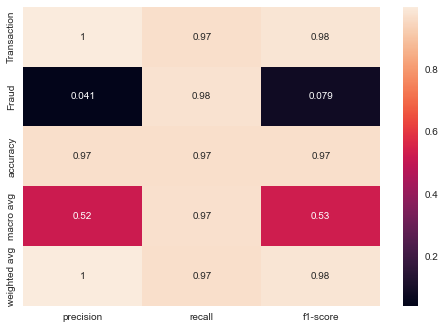

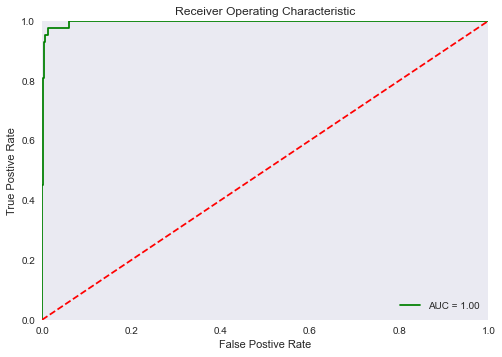

In [91]:
logestic_model = LogisticRegression(max_iter= 100, penalty= 'l2', random_state=32)
logestic_model.fit(X_train, y_train)
y_pred = logestic_model.predict(X_test)
y_pred_prob = logestic_model.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result(y_test, y_pred, prob, plot_roc=True)

---

# Experiments Result
* Experiment 1&2 for outliers             =>
* Experiment 3&4 for kmeans on/off        =>
* Experiment 5&6 for imbalanced_technique => best for big dataset is undersampling even if dataset will be 800 record

الحمد لله الذي وفقني لهذا